### Agenda


##### 
1. Importing Libraries
2. loading Dataset
3. Data Cleaning
4. data Visulization
5. Word Cloud


### To be done

#### Change the datatype of date_added column to datetime datatype

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# to ignore the unwanted future warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.shape

(8807, 12)

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# check the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
# check the the null values

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
# check the duplicates 
df.duplicated().sum()

0

In [14]:
# make a copy of the original
df1 = df.copy()

In [15]:
df1.head

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

In [16]:
df1.shape

(8807, 12)

In [17]:
# drop the null values

df1 = df1.dropna()

In [18]:
df1.shape

(5332, 12)

### check the categories for type column

In [20]:
# check the categories for type column

df1['type'].value_counts()

type
Movie      5185
TV Show     147
Name: count, dtype: int64

In [21]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [22]:
df1['country'].value_counts()

country
United States                                   1846
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: count, Length: 604, dtype: int64

In [23]:
len(df1['country'].value_counts())

604

### change the data type of date_added column to datetime

In [25]:
df1['date_added'] = pd.to_datetime(df1['date_added'],errors='coerce')

In [26]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [27]:
# create  new column having only the added years
df1['year_added'] = df1['date_added'].dt.year

In [28]:
df1['year_added']

7       2021.0
8       2021.0
9       2021.0
12      2021.0
24      2021.0
         ...  
8801    2016.0
8802    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year_added, Length: 5332, dtype: float64

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5328 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  year_added    5328 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 583.2+ KB


In [30]:
df1['date_added'] = pd.to_datetime(df1['date_added'],errors='coerce')

In [31]:
# extract the month and the day in the new column

df1['month_added'] = df1['date_added'].dt.month
df1['day_added'] = df1['date_added'].dt.day

In [32]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,24.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,24.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,23.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0,9.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,20.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,1.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,11.0


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5328 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  year_added    5328 non-null   float64       
 13  month_added   5328 non-null   float64       
 14  day_added     5328 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1),

In [34]:
df1 = df1.dropna()

In [35]:
# convert the datatype for newly added column in the integer
df1['year_added'] = df1['year_added'].astype(int)

In [36]:
df1['year_added']

7       2021
8       2021
9       2021
12      2021
24      2021
        ... 
8801    2016
8802    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 5328, dtype: int32

In [37]:
df1['month_added'] = df1['month_added'].astype(int)

In [38]:
df1['month_added']

7        9
8        9
9        9
12       9
24       9
        ..
8801     3
8802    11
8804    11
8805     1
8806     3
Name: month_added, Length: 5328, dtype: int32

In [39]:
df1['day_added'] = df1['day_added'].astype(int)

In [40]:
df1['day_added']

7       24
8       24
9       24
12      23
24      21
        ..
8801     9
8802    20
8804     1
8805    11
8806     2
Name: day_added, Length: 5328, dtype: int32

### Now we have succesfully complete our data cleaning part , we can get the information now


In [42]:
df1[(df1['year_added']) == 2021]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,s8188,Movie,The American President,Rob Reiner,"Michael Douglas, Annette Bening, Martin Sheen,...",United States,2021-01-01,1995,PG-13,113 min,"Comedies, Dramas, Romantic Movies",The widowed president strikes up a romance wit...,2021,1,1
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong",2021-01-01,2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,2021,1,1
8320,s8321,Movie,The Girl with the Dragon Tattoo,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","United States, Sweden, Norway",2021-01-05,2011,R,158 min,"Dramas, Thrillers",When a young computer hacker is tasked with in...,2021,1,5
8434,s8435,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",United States,2021-01-01,1988,PG-13,85 min,"Comedies, Cult Movies",Hapless cop Frank Drebin causes more problems ...,2021,1,1


In [43]:
len(df1[(df1['year_added']) == 2021])

755

In [44]:
df1[(df1['year_added'] == 2021) & (df1['type'] == 'Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,s8188,Movie,The American President,Rob Reiner,"Michael Douglas, Annette Bening, Martin Sheen,...",United States,2021-01-01,1995,PG-13,113 min,"Comedies, Dramas, Romantic Movies",The widowed president strikes up a romance wit...,2021,1,1
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong",2021-01-01,2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,2021,1,1
8320,s8321,Movie,The Girl with the Dragon Tattoo,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","United States, Sweden, Norway",2021-01-05,2011,R,158 min,"Dramas, Thrillers",When a young computer hacker is tasked with in...,2021,1,5
8434,s8435,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",United States,2021-01-01,1988,PG-13,85 min,"Comedies, Cult Movies",Hapless cop Frank Drebin causes more problems ...,2021,1,1


In [45]:
len(df1[(df1['year_added']) == 2020])

1194

In [46]:
df1[(df1['year_added'] == 2020) & (df1['type'] == 'TV Show')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
1520,s1521,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,2020-12-18,2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",2020,12,18
1530,s1531,TV Show,Schulz Saves America,Alexx Media,Andrew Schulz,United States,2020-12-17,2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedian Andrew Schulz takes on the year's mos...,2020,12,17
1532,s1533,TV Show,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,2020-12-16,2020,TV-MA,1 Season,"Docuseries, International TV Shows","In this intimate documentary, Brazilian pop qu...",2020,12,16
1587,s1588,TV Show,Detention,"Su I-Hsuan, Chuang Shiang-an, Liu Yi","Li Lingwei, Han Ning, Huang Guanzhi, Jack Yao,...",Taiwan,2020-12-05,2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",A tormented student uncovers unsettling secret...,2020,12,5
1654,s1655,TV Show,Before 30,BB Sasore,"Damilola Adegbite, O.C. Ukeje, Beverly Naya, M...",Nigeria,2020-11-24,2015,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Four female friends in the fast-paced city of ...,2020,11,24
1706,s1707,TV Show,The Minions of Midas,Mateo Gil,"Luis Tosar, Marta Belmonte, Guillermo Toledo, ...",Spain,2020-11-13,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A millionaire publisher gets a blackmail note ...,2020,11,13
1715,s1716,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020-11-11,2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...,2020,11,11
1771,s1772,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,2020-10-31,2017,TV-PG,1 Season,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...,2020,10,31
1794,s1795,TV Show,The Devil Punisher,"Chang Chin-jung, Chen Rong-hui","Mike He, Ivy Shao, Anson Chen, Jane Chang, Roy...",Taiwan,2020-10-26,2020,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","A baker by day and demon fighter by night, a r...",2020,10,26
1840,s1841,TV Show,Someone Has to Die,Manolo Caro,"Carmen Maura, Cecilia Suárez, Ester Expósito, ...","Mexico, Spain",2020-10-16,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","In conservative 1950s Spain, the alleged relat...",2020,10,16


In [47]:
len(df1[(df1['year_added'] == 2020) & (df1['type'] == 'TV Show')])

43

In [48]:
df1[(df1['year_added'] == 2020) &
(df1['type'] == 'TV Show') &
(df1['rating'] == 'TV-MA')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
1520,s1521,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,2020-12-18,2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",2020,12,18
1530,s1531,TV Show,Schulz Saves America,Alexx Media,Andrew Schulz,United States,2020-12-17,2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedian Andrew Schulz takes on the year's mos...,2020,12,17
1532,s1533,TV Show,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,2020-12-16,2020,TV-MA,1 Season,"Docuseries, International TV Shows","In this intimate documentary, Brazilian pop qu...",2020,12,16
1587,s1588,TV Show,Detention,"Su I-Hsuan, Chuang Shiang-an, Liu Yi","Li Lingwei, Han Ning, Huang Guanzhi, Jack Yao,...",Taiwan,2020-12-05,2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",A tormented student uncovers unsettling secret...,2020,12,5
1654,s1655,TV Show,Before 30,BB Sasore,"Damilola Adegbite, O.C. Ukeje, Beverly Naya, M...",Nigeria,2020-11-24,2015,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Four female friends in the fast-paced city of ...,2020,11,24
1706,s1707,TV Show,The Minions of Midas,Mateo Gil,"Luis Tosar, Marta Belmonte, Guillermo Toledo, ...",Spain,2020-11-13,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A millionaire publisher gets a blackmail note ...,2020,11,13
1840,s1841,TV Show,Someone Has to Die,Manolo Caro,"Carmen Maura, Cecilia Suárez, Ester Expósito, ...","Mexico, Spain",2020-10-16,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","In conservative 1950s Spain, the alleged relat...",2020,10,16
1880,s1881,TV Show,To the Lake,Pavel Kostomarov,"Viktoriya Isakova, Kirill Käro, Aleksandr Roba...",Russia,2020-10-07,2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",Facing the end of civilization when a terrifyi...,2020,10,7
1998,s1999,TV Show,Call the Midwife,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,2020-09-15,2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...,2020,9,15
2108,s2109,TV Show,Goedam,Hong Won-ki,"SEOLA, Lee Hyun-joo, Song Chae-yun, Han Ga-rim...",South Korea,2020-08-20,2020,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries","When night falls on the city, shadows and spir...",2020,8,20


In [49]:
# display the indian tv shows only
len(df1[(df1['year_added'] == 2020) &
 (df1['type'] == 'TV Show') &
 (df1['rating'] == 'TV-MA')])

    


29

In [64]:
# display the indian TV shows only
df1[(df1['country'] == 'India') &
 (df1['type'] == 'TV Show')]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-08-06,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions...",2021,8,6
1293,s1294,TV Show,Pitta Kathalu,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...","Manchu Lakshmi, Saanve Megghana, Naveen Kumar,...",India,2021-02-19,2021,TV-MA,1 Season,"International TV Shows, TV Dramas","From secrets and lies to jealousy and control,...",2021,2,19
1520,s1521,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,2020-12-18,2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",2020,12,18
3036,s3037,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,2020-01-10,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...,2020,1,10
4685,s4686,TV Show,GHOUL,Patrick Graham,"Radhika Apte, Manav Kaul, Ratnabali Bhattachar...",India,2018-08-24,2018,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror",When a new prisoner at a military detention ce...,2018,8,24
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019,7,30
8172,s8173,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,2018-03-31,2015,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising...",2018,3,31


In [68]:
# display the movies which was added after 2021 in netflix
df1[(df1['type'] == 'Movie') &
 (df1['year_added'] > 2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added


In [71]:
# display only the title , and released year whiich was released before 20
df1[(df1['release_year'] < 2000) &
 (df1['type'] == 'Movie')][['title','release_year','type']]

,title,release_year,type
7,Sankofa,1993,Movie
24,Jeans,1998,Movie
41,Jaws,1975,Movie
42,Jaws 2,1978,Movie
43,Jaws 3,1983,Movie
...,...,...,...
8742,Wild Wild West,1999,Movie
8745,Willy Wonka & the Chocolate Factory,1971,Movie
8748,Winter of Our Dreams,1981,Movie
8764,Wyatt Earp,1994,Movie


In [73]:
df1[(df1['release_year'] < 2000) &
 (df1['type'] == 'Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021,9,16
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,2021-09-16,1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,2021,9,16
43,s44,Movie,Jaws 3,Joe Alves,"Dennis Quaid, Bess Armstrong, Simon MacCorkind...",United States,2021-09-16,1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers",After the staff of a marine theme park try to ...,2021,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,s8743,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,2020-01-01,1999,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch...",2020,1,1
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,Mel Stuart,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany",2020-01-01,1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...,2020,1,1
8748,s8749,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,2016-11-01,1981,NR,86 min,"Classic Movies, Dramas","After the death of a long-ago lover, married p...",2016,11,1
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,2020,1,1


In [77]:
# display the movie where ratings are -- TV-MA and TV-PG "using isin()
df1[(df1['rating'].isin(['TV-MA','TV-PG'])) & (df1['country'] == 'India')]



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2021,9,2
202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,2021-08-27,2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...,2021,8,27
203,s204,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,2021-08-27,2016,TV-MA,124 min,"Comedies, International Movies",When an unlikely porn actor falls for a woman ...,2021,8,27
204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,2021-08-27,2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...,2021,8,27
206,s207,Movie,"LSD: Love, Sex Aur Dhokha",Dibakar Banerjee,"Nushrat Bharucha, Anshuman Jha, Neha Chauhan, ...",India,2021-08-27,2010,TV-MA,112 min,"Dramas, Independent Movies, International Movies",This provocative drama examines how the voyeur...,2021,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8713,s8714,Movie,Welcome 2 Karachi,Ashish R. Mohan,"Arshad Warsi, Jacky Bhagnani, Lauren Gottlieb,...",India,2018-03-01,2015,TV-MA,124 min,"Comedies, International Movies","Denied a U.S. visa, two dim Indian men decide ...",2018,3,1
8762,s8763,Movie,Wrong Side Raju,Mikhil Musale,"Pratik Gandhi, Kimberley Louisa McBeath, Asif ...",India,2017-10-01,2016,TV-MA,140 min,"Dramas, International Movies",The life of a chauffeur and part-time bootlegg...,2017,10,1
8769,s8770,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,2018-03-01,2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies","The lives of a middle-aged soap opera addict, ...",2018,3,1
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,2018,1,1


In [81]:
# dispaly the movies name and the release_year is from 2000 - 2010 "bet
df1[(df1['release_year'].between(2000, 2010))][['title','release_year']]


,title,release_year
27,Grown Ups,2010
48,Training Day,2001
51,InuYasha the Movie 2: The Castle Beyond the Lo...,2002
52,InuYasha the Movie 3: Swords of an Honorable R...,2003
53,InuYasha the Movie 4: Fire on the Mystic Island,2004
...,...,...
8793,"Yours, Mine and Ours",2005
8799,Zenda,2009
8802,Zodiac,2007
8804,Zombieland,2009


In [83]:
# display the movies released in between 2015-2020 and the country is indi
# whwre the ratings is TV-PG
df1[(df1['country'].isin(['India','United States'])) &
 (df1['release_year'].between(2015, 2020))&
 (df1['rating'] == 'TV-PG')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2021,9,2
901,s902,Movie,Deadly Switch,Svetlana Cvetko,"Teri Polo, Dylan Walsh, Danika Yarosh, Hayley ...",United States,2021-05-10,2019,TV-PG,86 min,"Independent Movies, Thrillers","In this indie thriller, a foreign exchange stu...",2021,5,10
913,s914,Movie,Time to Dance,Stanley Menino D'Costa,"Sooraj Pancholi, Isabelle Kaif, Rajpal Yadav, ...",India,2021-05-07,2020,TV-PG,107 min,"Dramas, International Movies, Romantic Movies",When a ballroom dancer’s shot at a crucial tou...,2021,5,7
973,s974,Movie,One,Santhosh Viswanath,"Mammootty, Joju George, Murali Gopy, Mathew Th...",India,2021-04-27,2020,TV-PG,149 min,"Dramas, International Movies",A formidable Kerala chief minister’s party loy...,2021,4,27
1042,s1043,TV Show,Garth Brooks: The Road I’m On,Glenn Weiss,Garth Brooks,United States,2021-04-15,2019,TV-PG,1 Season,Docuseries,Revealing interviews and archive footage tell ...,2021,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8170,s8171,Movie,Teshan,Sukhbir Singh,"Happy Raikoti, Diljott, Prince Kanwaljit Singh...",India,2017-10-15,2016,TV-PG,133 min,"Comedies, International Movies, Romantic Movies",New beginnings appear to be on the horizon aft...,2017,10,15
8239,s8240,Movie,The Case for Christ,Jon Gunn,"Mike Vogel, Erika Christensen, Faye Dunaway, R...",United States,2017-11-21,2017,TV-PG,113 min,"Dramas, Faith & Spirituality",Bothered by his wife's unyielding belief in Ch...,2017,11,21
8248,s8249,Movie,The Christmas Project,Michael Buster,"Jacob Buster, Anson Bagley, Grace Hallows, Jos...",United States,2019-03-01,2016,TV-PG,92 min,"Children & Family Movies, Comedies",Four brothers prepare for war when they're for...,2019,3,1
8677,s8678,Movie,Vikings Unearthed,Harvey Lilley,Eric Meyers,United States,2017-03-01,2016,TV-PG,113 min,Documentaries,Archaeologist Sarah Parcak follows clues to ea...,2017,3,1


### Data Visualization

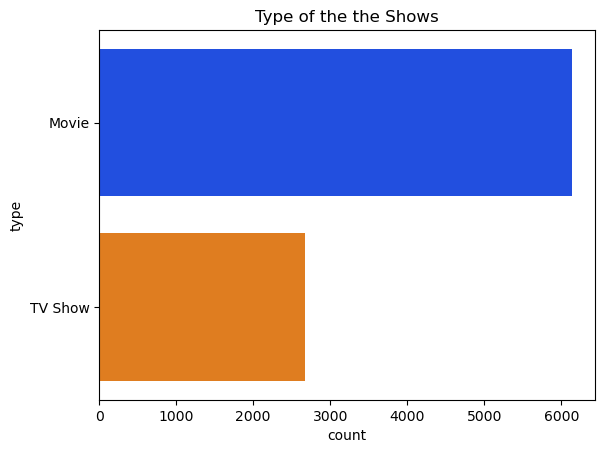

In [105]:
# visualize the countplot for movies and tvshows
sns.countplot(df['type'], palette = 'bright')
plt.title('Type of the the Shows')
plt.show()


### plot the ratings of tvshows and movies

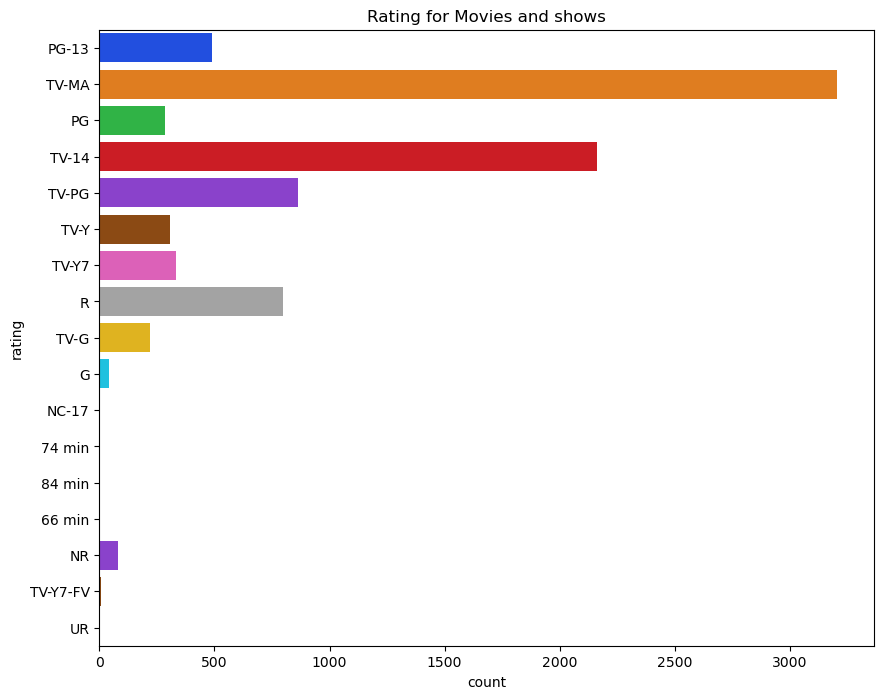

In [115]:
plt.figure(figsize = (10,8))
sns.countplot(df['rating'], palette = 'bright')
plt.title("Rating for Movies and shows")
plt.show()

### Draw the plot to check the relation between ratings with respect to Type


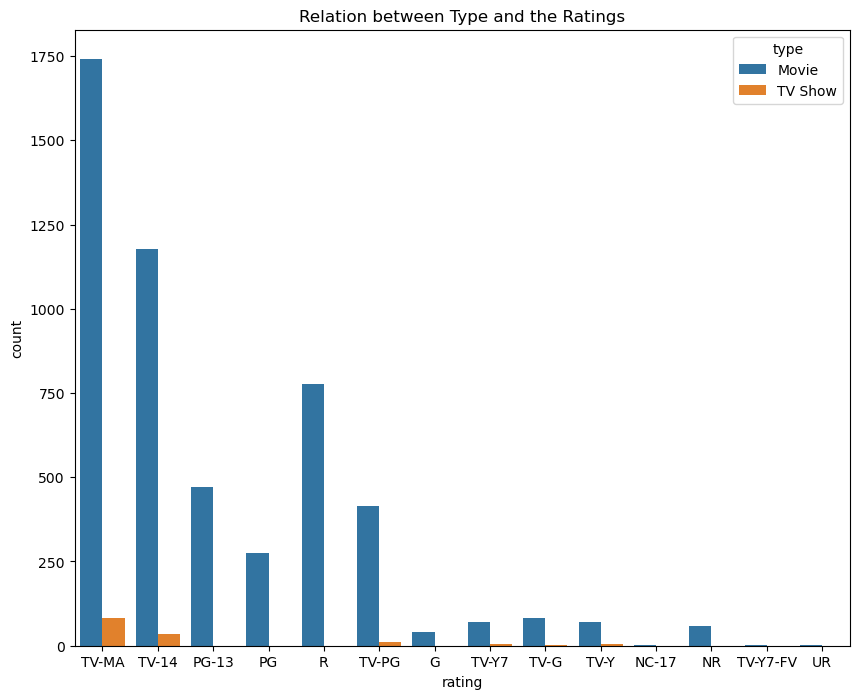

In [120]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'rating', hue = 'type', data = df1)
plt.title("Relation between Type and the Ratings")
plt.show()

In [124]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'rating', hue = 'type', data = data)
plt.title("Relation between Type and the Ratings")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x800 with 0 Axes>

### Pie chart for type column

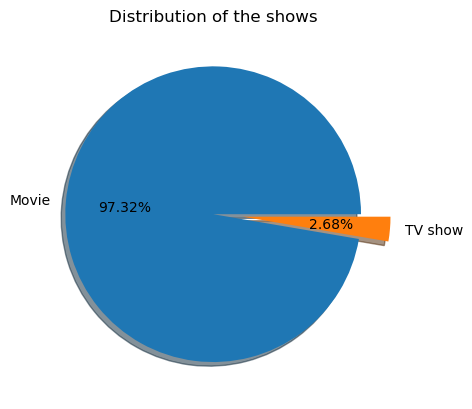

In [129]:
labls = ['Movie', 'TV show']
size = df1['type'].value_counts()
explode = [0,0.2]
plt.pie(size, labels = labls, autopct = '%1.2f%%', explode=explode,
 shadow = True)
plt.title('Distribution of the shows')
plt.show()


# pie chat for ratings


TypeError: 'Axes' object is not callable

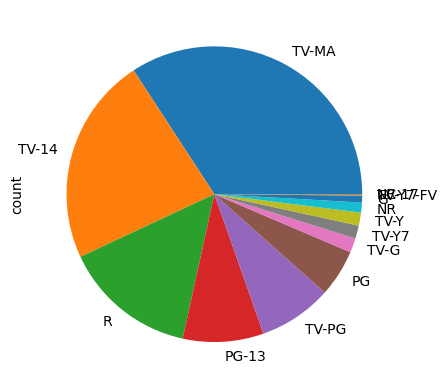

In [144]:
df1['rating'].value_counts().plot.pie()(autopct = '%1.2f%%',figsize = (10,8)
)
plt.show()

### Word Cloud

#### Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

In [87]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [88]:
# import the library

from wordcloud import WordCloud

In [89]:
df1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24


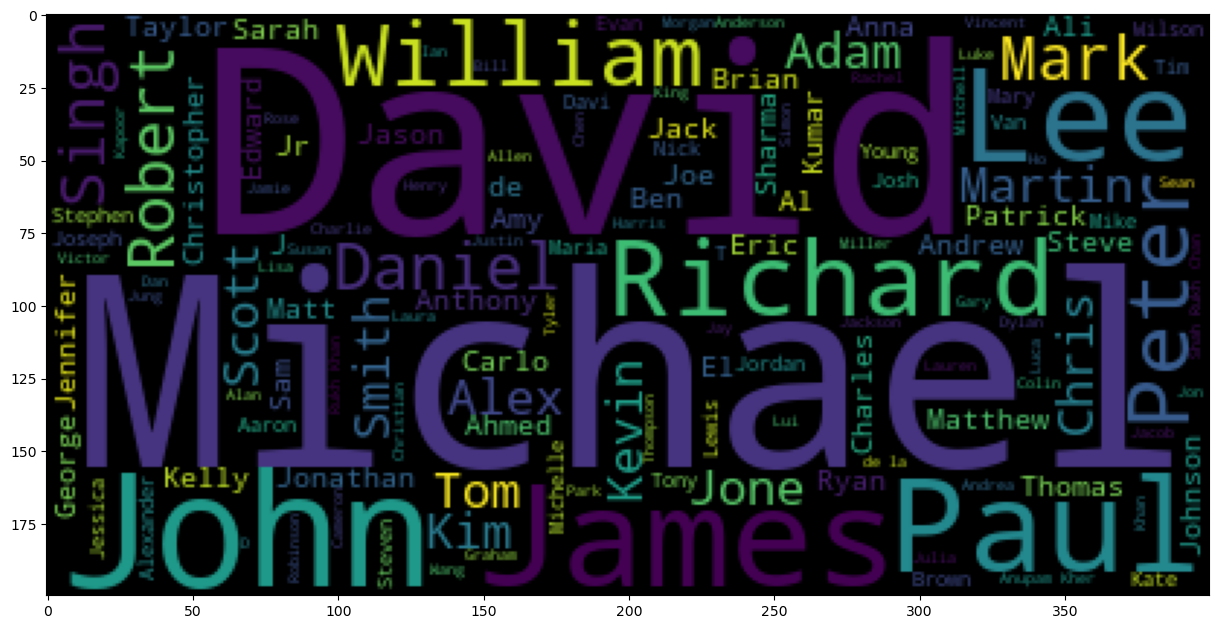

In [90]:
# plot the word cloud for cast in the shows

plt.subplots(figsize = (15,12))
# create an object for wordcloud module
wordcloud = WordCloud().generate(" ".join(df1.cast))
plt.imshow(wordcloud)
plt.show()

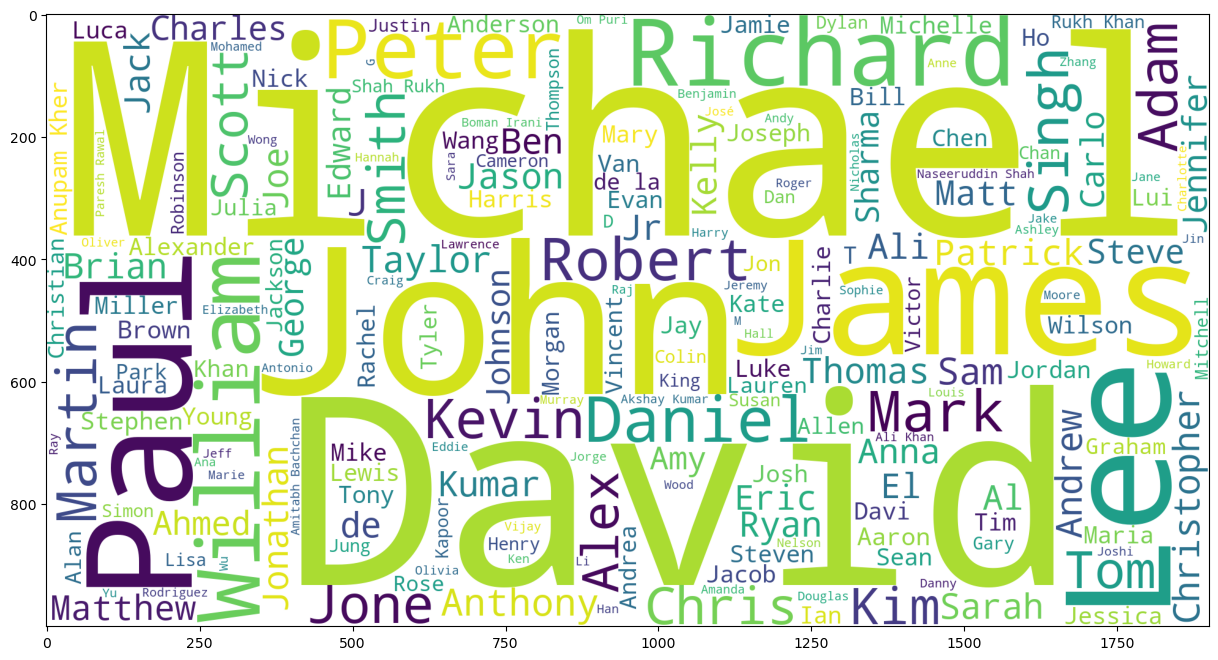

In [91]:
# plot the word cloud for cast in the shows

plt.subplots(figsize = (15,12))
# create an object for wordcloud module
wordcloud = WordCloud(background_color = 'white',width = 1900,height = 1000).generate(" ".join(df1.cast))
plt.imshow(wordcloud)
plt.show()

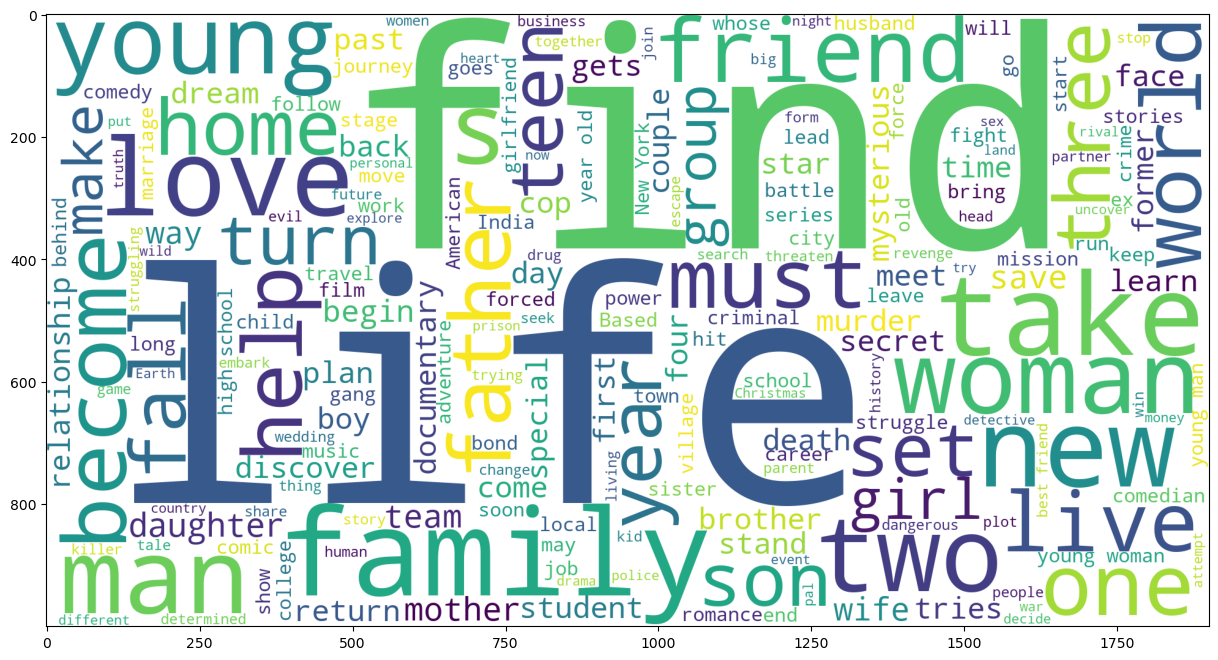

In [92]:
# plot the word cloud for cast in the shows

plt.subplots(figsize = (15,12))
# create an object for wordcloud module
wordcloud = WordCloud(background_color = 'white',width = 1900,height = 1000).generate(" ".join(df1.description))
plt.imshow(wordcloud)
plt.show()

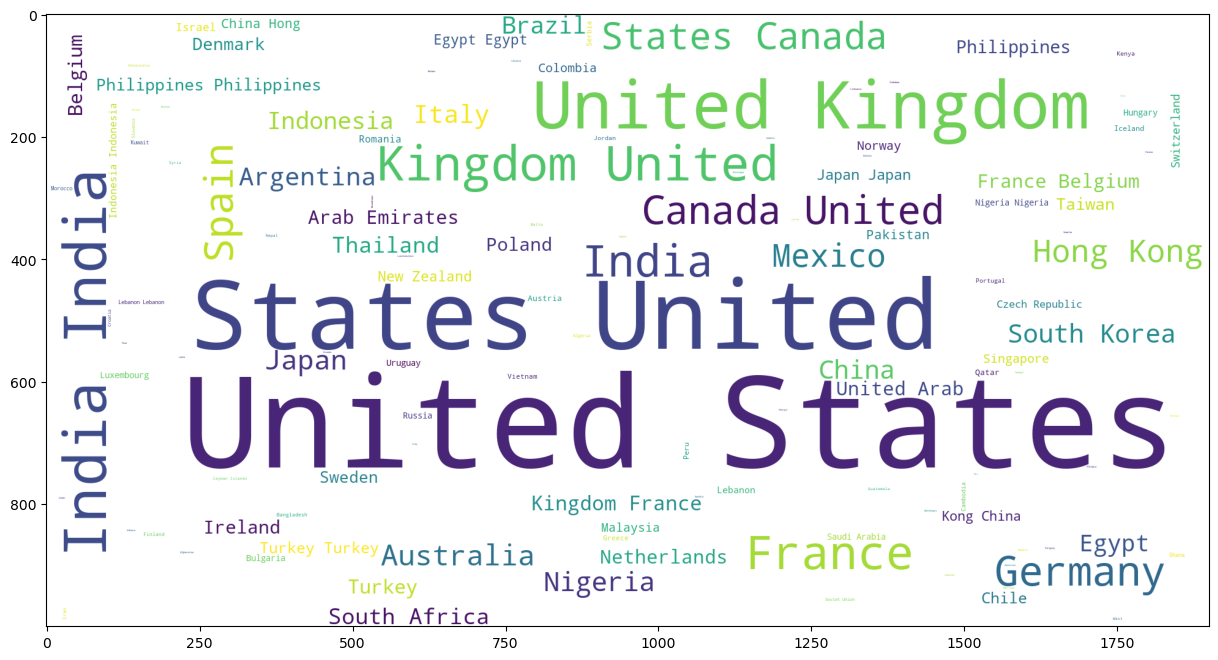

In [93]:
# plot the word cloud for cast in the shows

plt.subplots(figsize = (15,12))
# create an object for wordcloud module
wordcloud = WordCloud(background_color = 'white',width = 1900,height = 1000).generate(" ".join(df1.country))
plt.imshow(wordcloud)
plt.show()